# Question 3 Clustering

## 3a. Implement k-means

parameter: k (number of clusters), X (training data)

return: group assignment for each point, mean (center) of each group

initialize each cluster center by choosing a random point from the data

1. cluster center fixed, assign each point to its closest cluster center (Euclidean distance)

2. point cluster assignment fixed, adjust cluster centers as average of points in the cluster

In [119]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

In [22]:
def has_converged(centers_old, centers_new):
    if (centers_old is None or centers_new is None):
        return False
    assert centers_old.shape[0] == centers_new.shape[0]
    assert centers_old.shape[1] == centers_new.shape[1]
    # Returns True if two arrays are element-wise equal within a tolerance.
    return np.allclose(centers_old, centers_new)

In [29]:
def initialize_centers(k, X):
    p = X.shape[1]
    centers = np.zeros((k, p))
    n = X.shape[0]
    random_indices = np.random.randint(0, n, size=k)
    for i in range(k):
        centers[i, :] = X[random_indices[i], :]
    return centers

In [47]:
def assign_point_cluster(X, centers):
    assert X.shape[1] == centers.shape[1]
    # distances: n * k numpy array, see the function documentation
    distances = euclidean_distances(X, centers)
    # find the index of minimal distance (cluster index) in each row (each point)
    clusters = np.argmin(distances, axis=1)
    assert clusters.shape[0] == X.shape[0]
    return clusters

In [66]:
def update_cluster_center(k, X, clusters):
    centers = np.zeros([k, 2])
    for i in range(k):
        centers[i, :] = np.mean(X[clusters == i, :], axis=0)
    return centers

In [94]:
def kmeans(k, X):
    n, p = X.shape
    centers_old = None
    centers_new = initialize_centers(k, X)
    clusters = None
    while (not has_converged(centers_old, centers_new)):
        clusters = assign_point_cluster(X, centers_new)
        centers_old = centers_new
        centers_new = update_cluster_center(k, X, clusters)
    return clusters, centers_new

## 3b. Implement hierarchical agglomerative clustering

parameter: k (number of clusters), X (training data)

return: group assignment for each point

Initialize each point into its own cluster.

Recursively merge the clusters of 2 closest points (based on Euclidean distance), until there are k clusters left.

In [107]:
def compute_all_distances(X):
    distances = euclidean_distances(X)
    return distances

In [141]:
def agglomerative_clustering(k, X):
    n = X.shape[0]
    distances = compute_all_distances(X)
    root_children_dict = dict()
    parent_index = list()
    for i in range(n):
        distances[i, i] = float('inf')
        root_children_dict[i] = set()
        root_children_dict[i].add(i)
        parent_index[i] = -1
    while (len(root_children_dict) != k): # the length of the dict should decrease 1 in each loop
        (i, j) = np.unravel_index(distances.argmin(), distances.shape)
        distances[i, j] = float('inf')
        distances[j, i] = float('inf')
        root_children_dict[i] = root_children_dict[i].union(root_children_dict[j])
        del root_children_dict[j]
        x
    clusters = np.zeros([n, 1])
    cluster = 0
#     print(root_children_dict)
    for same_cluster_set in root_children_dict.values():
        for point in same_cluster_set:
             clusters[point] = int(cluster)
        cluster += 1
    return clusters.flatten()

## 3c. Run algorithms on dataset, with k = 2

In [18]:
X = np.genfromtxt('data.csv', delimiter=',')

### k-means

In [127]:
clusters, centers = kmeans(2, X)
X_0 = X[clusters == 0]
X_1 = X[clusters == 1]

TypeError: 'KMeans' object is not callable

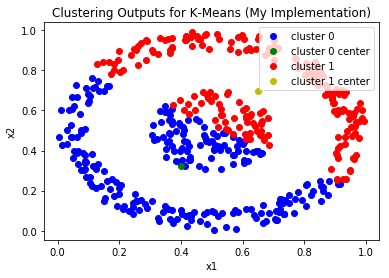

In [97]:
plt.plot(X_0[:, 0], X_0[:, 1], 'bo', label='cluster 0')
plt.plot(centers[0, 0], centers[0, 1], 'go', label='cluster 0 center')
plt.plot(X_1[:, 0], X_1[:, 1], 'ro', label='cluster 1')
plt.plot(centers[1, 0], centers[1, 1], 'yo', label='cluster 1 center')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for K-Means (My Implementation)')
plt.show()

verify with sklearn package

In [104]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
centers_pkg = kmeans.cluster_centers_
X_0_pkg = X[labels == 0]
X_1_pkg = X[labels == 1]

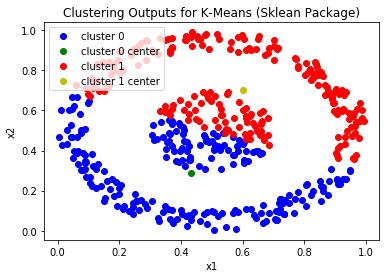

In [105]:
plt.plot(X_0_pkg[:, 0], X_0_pkg[:, 1], 'bo', label='cluster 0')
plt.plot(centers_pkg[0, 0], centers_pkg[0, 1], 'go', label='cluster 0 center')
plt.plot(X_1_pkg[:, 0], X_1_pkg[:, 1], 'ro', label='cluster 1')
plt.plot(centers_pkg[1, 0], centers_pkg[1, 1], 'yo', label='cluster 1 center')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for K-Means (Sklean Package)')
plt.show()

So the output of my implementation is pretty similar to that of the Sklearn package.

### hierarchical agglomerative clustering

In [142]:
clusters = agglomerative_clustering(2, X)
X_0 = X[clusters == 0]
X_1 = X[clusters == 1]

{291}
{357}
{301}


KeyError: 357

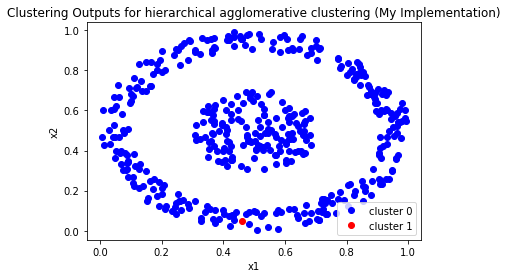

In [132]:
plt.plot(X_0[:, 0], X_0[:, 1], 'bo', label='cluster 0')
plt.plot(X_1[:, 0], X_1[:, 1], 'ro', label='cluster 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for hierarchical agglomerative clustering (My Implementation)')
plt.show()

verify with Sklean package

In [122]:
ac = AgglomerativeClustering(n_clusters=2).fit(X)
labels = ac.labels_
X_0_pkg = X[labels == 0]
X_1_pkg = X[labels == 1]

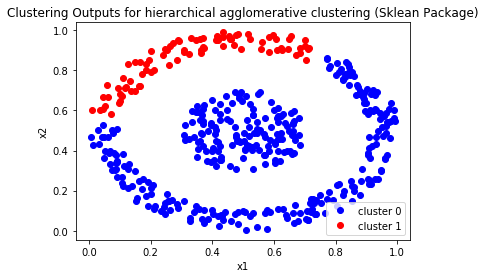

In [123]:
plt.plot(X_0_pkg[:, 0], X_0_pkg[:, 1], 'bo', label='cluster 0')
plt.plot(X_1_pkg[:, 0], X_1_pkg[:, 1], 'ro', label='cluster 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for hierarchical agglomerative clustering (Sklean Package)')
plt.show()